## 활성함수 실습
활성함수는 신경망에서 입력신호의 가중치 합을 출력 신호로 변환하는 함수로, 딥러닝에서 비선형성을 학습할 수 있게 한다.
#### 1. sigmoid
#### 2. Tanh
#### 3. ReLU
#### 4. Leaky ReLU
#### 5. SoftMax

### 1. Sigmoid
시그모이드는 1~0의 범위를 가지며, 확률을 기반으로 이진분류에서 사용된다. 하지만, gradient vanishing 문제를 가지고 있다.
### $$\frac{1}{1+e^{-x}}$$


In [1]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 200)
y = sigmoid(x)

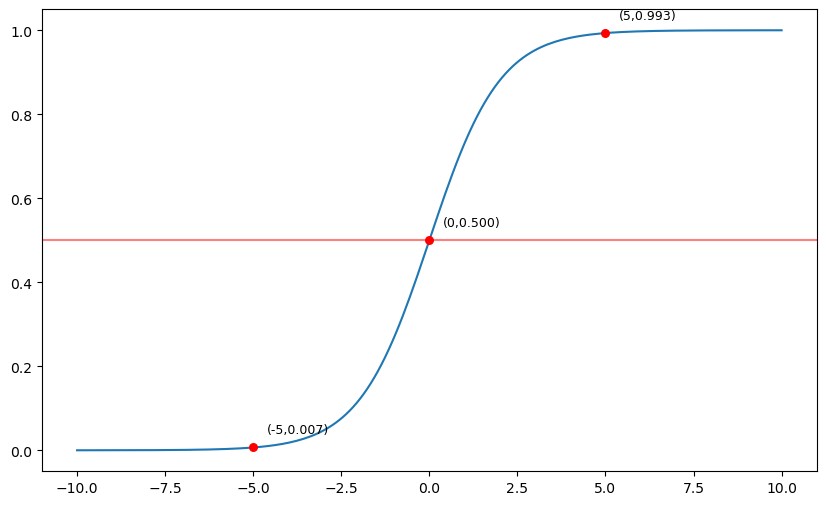

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x,y)
plt.axhline(y=0.5, color='r', linestyle='-', alpha=0.5, label='y=0.5')

#주요 포인트
point_x = [-5, 0, 5]
point_y = sigmoid(np.array(point_x))
plt.scatter(point_x, point_y, color='red', s=30, zorder=10)

for px, py in zip(point_x, point_y):
    plt.annotate(f'({px},{py:.3f})',
                xy=(px, py),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9)

plt.show()

### 2. Tanh
RNN, LSTM과 같은 순환 신경망 은닉층에서 사용하며, zero centered해서 시그모이드보다 지그재그가 덜 하다.
### $$\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

In [7]:
def Tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [9]:
x = np.linspace(-10, 10, 200)
y = Tanh(x)

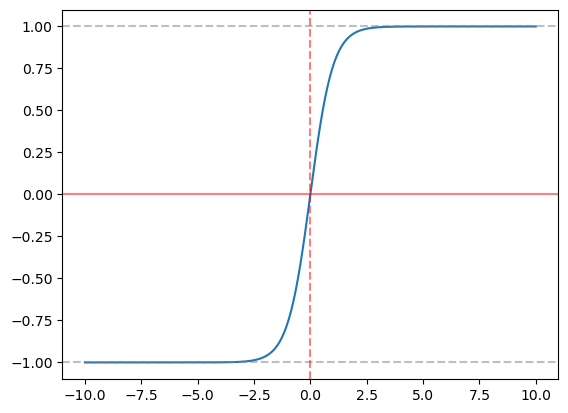

In [11]:
plt.plot(x,y)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.5, label='y=0.5')
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='y=0.5')
plt.axhline(y=-1, color='gray', linestyle='--', alpha=0.5, label='y=0.5')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='y=0.5')
plt.show()

### 3. ReLU
기울기소실문제 완화된다. 양수부분 미분값이 1이므로 역전파시에도 기울기 그대로 전달한다. 다만 Dying ReLU문제가 발생해, 음수입력에서 출력, 미분 모두 -이 나와 한번 음수로 가면 뉴런 죽어서 살아나지 못한다. 대부분의 딥러닝 은닉층과 CNN 컴퓨터 비전에서 활용한다.
### $$\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

In [14]:
def ReLU(x):
    return np.maximum(0, x)

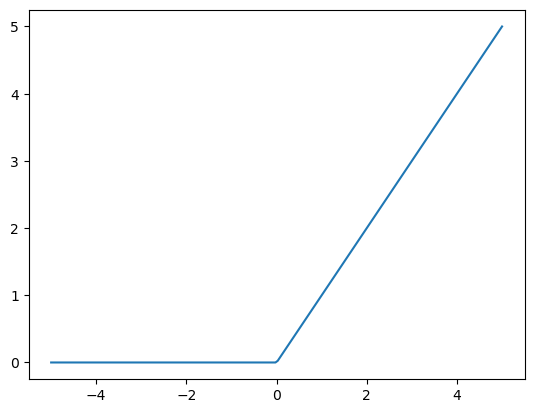

In [16]:
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 200)
y = ReLU(x)
plt.plot(x, y)
plt.show()

### 4. Leaky ReLU
ReLU의 Dying ReLU를 해결하는 기법. 음수에서 0이 되는 것을 알파를 주어 음수에서 작은 기울기를 존재하게 만드는 방식이다.

#### $$ max(ax, x) $$

In [21]:
import numpy as np
#여기서는 알파를 0.1로 설정. 보통 0.01로 설정한다고 한다.
def LeakyReLU(x):
    return np.maximum(0.1*x, x)

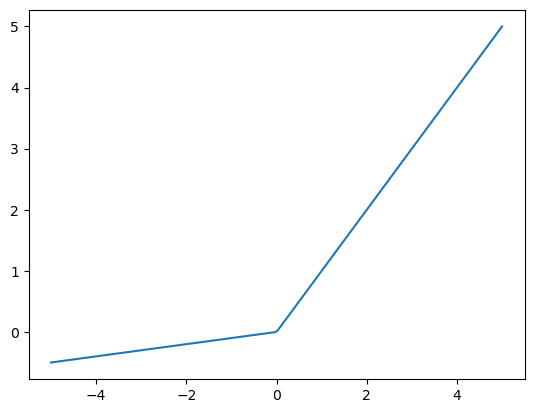

In [23]:
x = np.linspace(-5, 5, 200)
y = LeakyReLU(x)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

### 5. SoftMax
다중 분류시 활용하는 활성함수로, 특정 클래스에 속할 확률을 모든 클래스의 지수값의 합으로 나눈 값이다. 확률로 해석 가능하고, 출력층에서 활용된다.


In [2]:
import numpy as np
def SoftMax(x):
    return np.exp(x) / sum(np.exp(x))

In [4]:
x = [1, 2, 3, 4]
SoftMax(x)

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])